# Definitions

In [1]:
# change working directory to the project root
import os
os.chdir('../../')

import sys
sys.path.append('models/utils')
sys.path.append('models/brian2')
sys.path.append('models/aln')

In [2]:
# aln-imports
import defaultParameters as dp
import fitparams as fp
import paths 

# python-imports
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors

In [3]:
params = dp.loadDefaultParams(singleNode = 1)
#params = fp.load_everadapt(params, reloadDefaults=False)

params['dt'] = 0.01
params['duration'] = 10000.0
params['sigma_ou'] = 0.0015 # 0.0

# Plot data

Saving transfer-functions


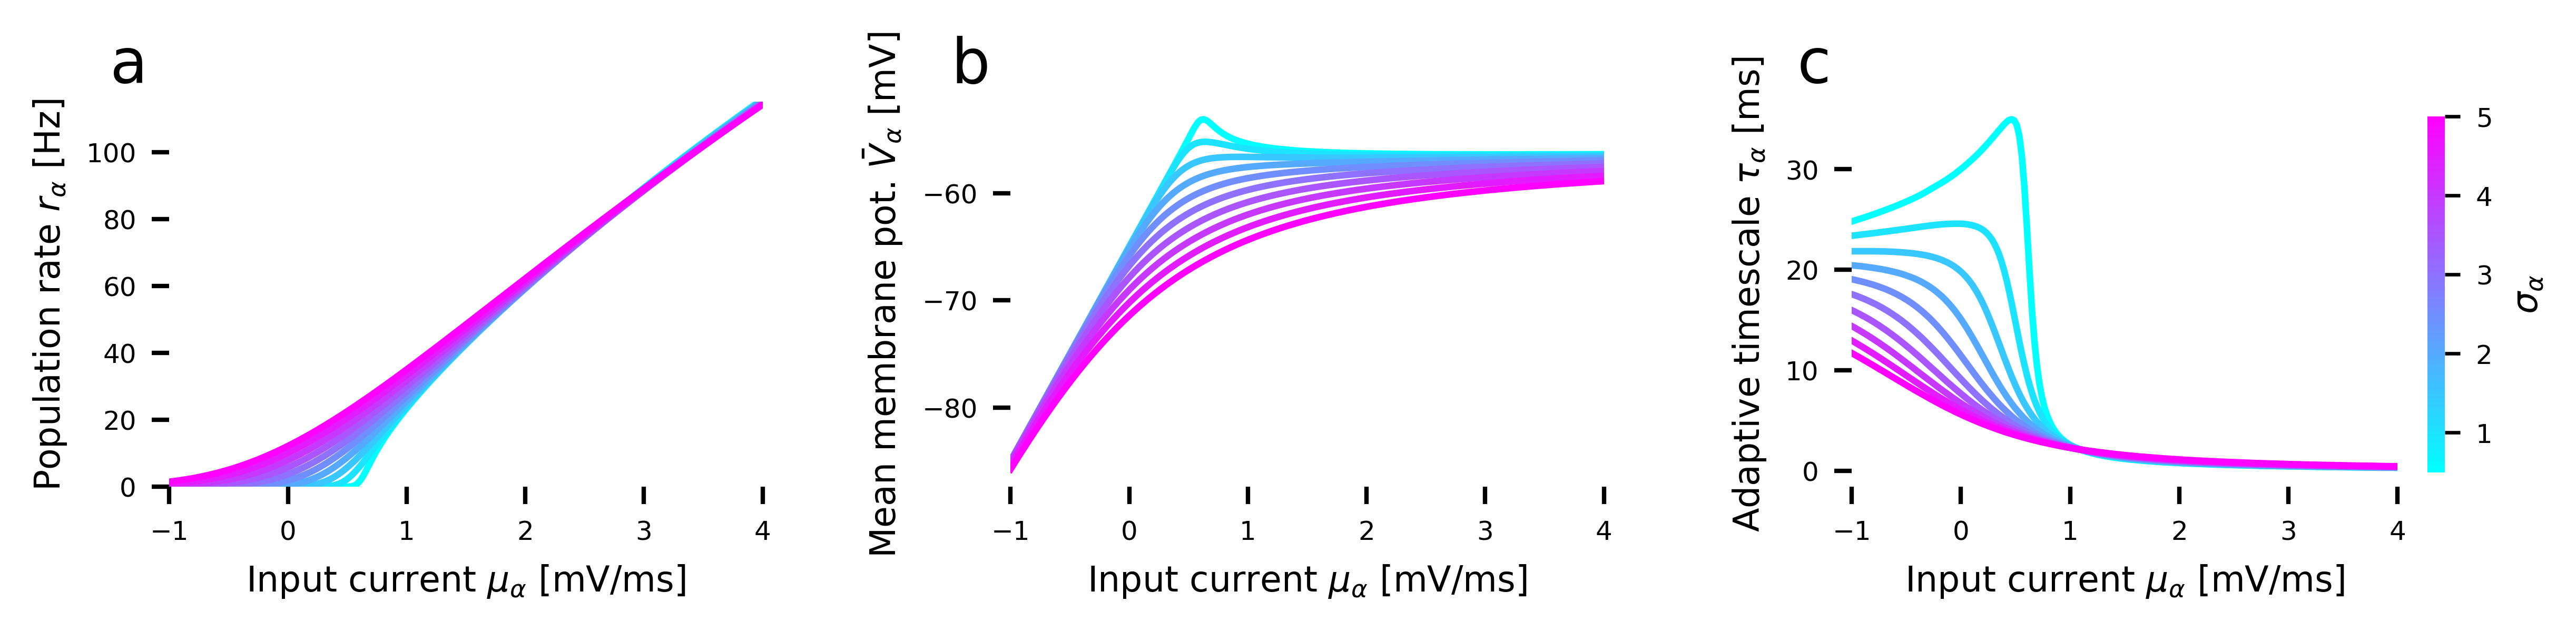

In [4]:
cmap = plt.cm.cool
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=5.0)
def c(c): return cmap(norm(c))

Irange = params['Irange']
every_sigma = 7

f, axs = plt.subplots(1, 3, figsize=(8, 2), dpi=600)
for i in range(64)[::every_sigma]:
    thisSigma = params['sigmarange'][i]
    axs[0].plot(Irange, params['precalc_r'][:, i]*1000.0, c=c(thisSigma));
    axs[1].plot(Irange, params['precalc_V'][:, i], color=c(thisSigma));    
    axs[2].plot(Irange, params['precalc_tau_mu'][:, i], color=c(thisSigma));

axs[0].set_xlim(-1, 4)
axs[0].set_ylim(0, 115)
axs[0].set_xlabel("Input current $\\mu_\\alpha$ [mV/ms]", fontsize = 8)
axs[0].set_ylabel("Population rate $r_\\alpha$ [Hz]", fontsize = 8)
axs[1].set_xlim(-1, 4)
axs[1].set_xlabel("Input current $\\mu_\\alpha$ [mV/ms]", fontsize = 8)
axs[1].set_ylabel("Mean membrane pot. $\\bar{V}_\\alpha$ [mV]", fontsize = 8)  
axs[2].set_xlim(-1, 4)
axs[2].set_xlabel("Input current $\\mu_\\alpha$ [mV/ms]", fontsize = 8)
axs[2].set_ylabel("Adaptive timescale $\\tau_\\alpha$ [ms]", fontsize = 8)
plt.tight_layout()
f.subplots_adjust(left=0.06, right=0.96)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = f.colorbar(sm, fraction = 0.03, ticks=params['sigmarange'][every_sigma::every_sigma][::2])
cbar.ax.tick_params(labelsize=6) 
cbar.set_label('$\sigma_\\alpha$', fontsize = 8)
cbar.outline.set_linewidth(0)

for k in range(3):
    axs[k].tick_params(size=1)
    axs[k].tick_params(length=3)
    axs[k].text(-0.1, 1.05, ['a','b','c'][k], transform=axs[k].transAxes, fontsize=14)

for k in range(3):
    axs[k].spines['right'].set_visible(False)
    axs[k].spines['top'].set_visible(False)
    axs[k].spines['bottom'].set_visible(False)
    axs[k].spines['left'].set_visible(False)
    axs[k].tick_params(direction='out', length=4, width=1, colors='k', labelsize=6)

fname = "transfer-functions"
print("Saving {}".format(fname))
for extension in ['png', 'svg', 'jpg']:
    plt.savefig(os.path.join(paths.FIGURES_DIR, "{}.{}".format(fname, extension)))
plt.show()    